In [1]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen

url_base = "https://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20220810"

page = url_base + url_syb
html = urlopen(page)

soup = BeautifulSoup(html, "html.parser")
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=81888" title="탑건: 매버릭">탑건: 매버릭</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=217719" title="명탐정 코난: 할로윈의 신부">명탐정 코난: 할로윈의 신부</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=192608" title="범죄도시2">범죄도시2</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=213733" title="극장판 주술회전 0">극장판 주술회전 0</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=154437" title="내 사랑">내 사랑</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=208772" title="카시오페아">카시오페아</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=36944" title="올드보이">올드보이</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=23525" title="하녀">하녀</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=17059" title="중경삼림">중경삼림<

In [2]:
#제목만 찾기

soup.find_all('div', 'tit5')[0].a.string

'탑건: 매버릭'

In [3]:
#포인트 찾기

soup.find_all('td', 'point')[0].string

'9.78'

In [4]:
date = pd.date_range('2022-05-04', periods=100, freq ='D')
date

DatetimeIndex(['2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07',
               '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11',
               '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
               '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
               '2022-05-20', '2022-05-21', '2022-05-22', '2022-05-23',
               '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27',
               '2022-05-28', '2022-05-29', '2022-05-30', '2022-05-31',
               '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04',
               '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08',
               '2022-06-09', '2022-06-10', '2022-06-11', '2022-06-12',
               '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16',
               '2022-06-17', '2022-06-18', '2022-06-19', '2022-06-20',
               '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24',
               '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28',
      

In [5]:
from tqdm.notebook import tqdm
import urllib.request

movie_date = []
movie_name= []
movie_point = []


for today in tqdm(date):
  html_new = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
  response = urlopen(html_new.format(date = urllib.parse.quote(today.strftime('%Y%m%d'))))
  soup = BeautifulSoup(response, "html.parser")
  end = len(soup.find_all('td', 'point'))

  movie_date.extend([today for n in range(0, end)])
  movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
  movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])


  0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
len(movie_date), len(movie_name), len(movie_point)

(3685, 3685, 3685)

In [7]:
movie = pd.DataFrame({'date': movie_date, 'name':movie_name, 'point': movie_point})
movie['point'] = pd.to_numeric(movie['point'])
movie.head()

,date,name,point
0,2022-05-04,씽2게더,9.39
1,2022-05-04,시네마 천국,9.33
2,2022-05-04,극장판 귀멸의 칼날: 무한열차편,9.27
3,2022-05-04,극장판 주술회전 0,9.26
4,2022-05-04,피아니스트의 전설,9.25


In [8]:
movie.dtypes

date     datetime64[ns]
name             object
point           float64
dtype: object

In [9]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], values = 'point', aggfunc=np.sum)
movie_best = movie_unique.sort_values(by ='point', ascending = False)
movie_best.head()

,point
name,
극장판 주술회전 0,924.77
코다,912.83
중경삼림,880.90
범죄도시2,814.13
드라이브 마이 카,697.99


영화별 점수의 합계로 정렬하여 고득점 영화 1위부터 5위를 출력

In [10]:
tmp = movie.query('name == ["탑건: 매버릭"]')
tmp

,date,name,point
1867,2022-06-22,탑건: 매버릭,9.76
1913,2022-06-23,탑건: 매버릭,9.77
1962,2022-06-24,탑건: 매버릭,9.78
2012,2022-06-25,탑건: 매버릭,9.80
2058,2022-06-26,탑건: 매버릭,9.82
2098,2022-06-27,탑건: 매버릭,9.81
2143,2022-06-28,탑건: 매버릭,9.81
2188,2022-06-29,탑건: 매버릭,9.81
2234,2022-06-30,탑건: 매버릭,9.80
2276,2022-07-01,탑건: 매버릭,9.80


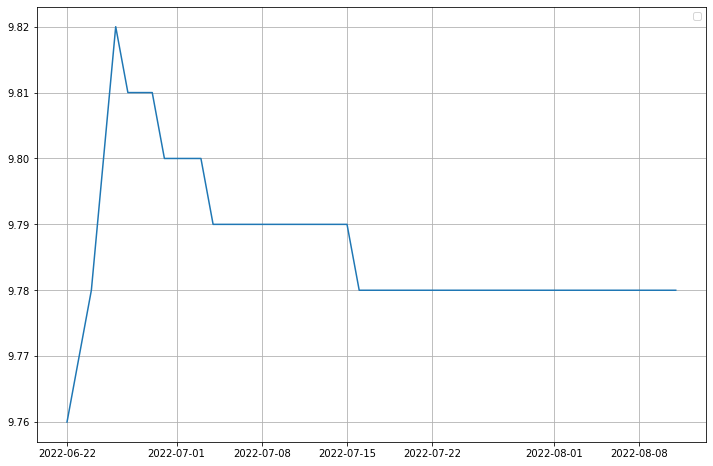

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc ='best')
plt.grid()
plt.show()

탑건: 매버릭에 대한 영화 평점의 변화를 그래프로 나타내었다.

### 영화별 날짜 변화에 따른 평점 변화 확인하기

In [12]:
movie_pivot = pd.pivot_table(movie, index = ['date'], columns = ['name'], values=['point'])
movie_pivot.head()

point                                                    \
name       개를 훔치는 완벽한 방법 걸어도 걸어도 경계선 고스트 스토리  공기살인 광대: 소리꾼 군도:민란의 시대    귀향   
date                                                                         
2022-05-04           9.0     NaN NaN     NaN  8.59     NaN       NaN  8.67   
2022-05-05           9.0     NaN NaN     NaN  8.58     NaN       NaN  8.67   
2022-05-06           9.0     NaN NaN     NaN  8.59     NaN       NaN  8.67   
2022-05-07           9.0     NaN NaN     NaN  8.60     NaN       NaN  8.67   
2022-05-08           9.0     NaN NaN     NaN  8.60     NaN       NaN   NaN   

                       ...                                                  \
name        그녀 그대가 조국  ... 한여름의 판타지아 해운대 해피 투게더  헌트 헤어질 결심 헤이트풀8 혼자 사는 사람들   
date                   ...                                                   
2022-05-04 NaN    NaN  ...       7.8 NaN    NaN NaN    NaN   NaN       NaN   
2022-05-05 NaN    NaN  ...       7.8 NaN    NaN NaN    NaN   NaN       NaN   
2022-05-06 NaN    NaN  ...       7.8 NaN    NaN NaN    NaN   NaN       NaN   
2022-05-07 NaN    NaN  ...       7.8 NaN    NaN NaN    NaN   NaN       NaN   
2022-05-08 NaN    NaN  ...       7.8 NaN    NaN NaN    NaN   NaN       NaN   

                               
name       홀리 모터스  화양연화 환상의 빛  
date                           
2022-05-04    NaN   NaN   NaN  
2022-05-05    NaN   NaN   NaN  
2022-05-06    NaN  8.81   NaN  
2022-05-07    NaN  8.81   NaN  
2022-05-08    NaN  8.81   NaN  

[5 rows x 138 columns]

In [13]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,개를 훔치는 완벽한 방법,걸어도 걸어도,경계선,고스트 스토리,공기살인,광대: 소리꾼,군도:민란의 시대,귀향,그녀,그대가 조국,...,한여름의 판타지아,해운대,해피 투게더,헌트,헤어질 결심,헤이트풀8,혼자 사는 사람들,홀리 모터스,화양연화,환상의 빛
date,,,,,,,,,,,,,,,,,,,,,
2022-05-04,9.0,NaN,NaN,NaN,8.59,NaN,NaN,8.67,NaN,NaN,...,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-05,9.0,NaN,NaN,NaN,8.58,NaN,NaN,8.67,NaN,NaN,...,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-06,9.0,NaN,NaN,NaN,8.59,NaN,NaN,8.67,NaN,NaN,...,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.81,NaN
2022-05-07,9.0,NaN,NaN,NaN,8.60,NaN,NaN,8.67,NaN,NaN,...,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.81,NaN
2022-05-08,9.0,NaN,NaN,NaN,8.60,NaN,NaN,NaN,NaN,NaN,...,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.81,NaN


point 인덱스를 제거하였다.

In [14]:
import matplotlib as mpl 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


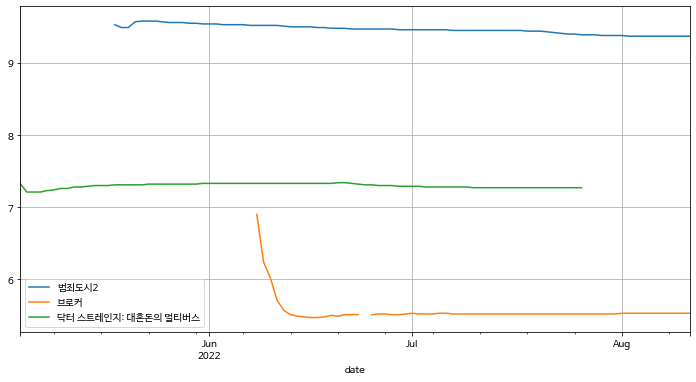

In [15]:
movie_pivot.plot(y = ['범죄도시2', '브로커', '닥터 스트레인지: 대혼돈의 멀티버스'], figsize=(12,6))
plt.legend(loc='best')
plt.grid()
plt.show()